In [1]:
import numpy as np
import pandas as pd
from time import time
from influxdb import InfluxDBClient
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from influx_plugins.utils import parse_time_to_epoch

In [57]:
client = InfluxDBClient(
    host="127.0.0.1",
    port=8086,
    username="root",
    password="root",
)

In [58]:
client.get_list_database()

DEBUG:connectionpool.py:_new_conn:226:Starting new HTTP connection (1): 127.0.0.1:8086
DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=SHOW+DATABASES HTTP/1.1" 200 None


[{'name': 'test'}, {'name': '_internal'}, {'name': 'test_db'}]

In [110]:
client.switch_database("test_db")

In [113]:
client.get_list_measurements()

DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=SHOW+MEASUREMENTS&db=test_db HTTP/1.1" 200 None


[{'name': 'anomaly_measurement_icinga'},
 {'name': 'anomaly_measurement_telegraf'},
 {'name': 'anomaly_measurement_telegraf_ml'},
 {'name': 'check_time_measurement_icinga'},
 {'name': 'check_time_measurement_telegraf'}]

In [61]:
list(client.query(
"""
SELECT DISTINCT(service) as selector
FROM (
    SELECT * 
    FROM anomaly_measurement_telegraf 
)
""").get_points())

DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=%0ASELECT+DISTINCT%28service%29+as+selector%0AFROM+%28%0A++++SELECT+%2A+%0A++++FROM+anomaly_measurement_telegraf+%0A%29%0A&db=test_db HTTP/1.1" 200 None


[{'time': '1970-01-01T00:00:00Z', 'selector': 'service02'},
 {'time': '1970-01-01T00:00:00Z', 'selector': 'service01'}]

In [62]:
list(client.query(
"""
SELECT * 
FROM anomaly_measurement_telegraf 
""").get_points())

DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=%0ASELECT+%2A+%0AFROM+anomaly_measurement_telegraf+%0A&db=test_db HTTP/1.1" 200 None


[{'time': '2021-09-05T08:49:56.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.0},
 {'time': '2021-09-05T08:49:57.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.0004806007509386733},
 {'time': '2021-09-05T08:49:58.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.0009411764705882352},
 {'time': '2021-09-05T08:49:59.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.001381727158948686},
 {'time': '2021-09-05T08:50:00.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.001802252816020025},
 {'time': '2021-09-05T08:50:01.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.0022027534418022528},
 {'time': '2021-09-05T08:50:02.310240Z',
  'host': 'host02',
  'kpi': 'disk_util',
  'service': 'service02',
  'value': -0.0025832290362953693},
 {'ti

In [63]:
client.query(
"""
SELECT value
FROM anomaly_measurement_telegraf 
""")

DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=%0ASELECT+value%0AFROM+anomaly_measurement_telegraf+%0A&db=test_db HTTP/1.1" 200 None


ResultSet({'('anomaly_measurement_telegraf', None)': [{'time': '2021-09-05T08:49:56.310240Z', 'value': -0.0}, {'time': '2021-09-05T08:49:57.310240Z', 'value': -0.0004806007509386733}, {'time': '2021-09-05T08:49:58.310240Z', 'value': -0.0009411764705882352}, {'time': '2021-09-05T08:49:59.310240Z', 'value': -0.001381727158948686}, {'time': '2021-09-05T08:50:00.310240Z', 'value': -0.001802252816020025}, {'time': '2021-09-05T08:50:01.310240Z', 'value': -0.0022027534418022528}, {'time': '2021-09-05T08:50:02.310240Z', 'value': -0.0025832290362953693}, {'time': '2021-09-05T08:50:03.310240Z', 'value': -0.002943679599499374}, {'time': '2021-09-05T08:50:04.310240Z', 'value': -0.0032841051314142678}, {'time': '2021-09-05T08:50:05.310240Z', 'value': -0.0036045056320400505}, {'time': '2021-09-05T08:50:06.310240Z', 'value': -0.003904881101376721}, {'time': '2021-09-05T08:50:07.310240Z', 'value': -0.004185231539424281}, {'time': '2021-09-05T08:50:08.310240Z', 'value': -0.004445556946182728}, {'time':

In [93]:
result = client.query(
"""
SELECT value
FROM anomaly_measurement_telegraf 
GROUP BY host, service 
""")
result

DEBUG:connectionpool.py:_make_request:433:http://127.0.0.1:8086 "GET /query?q=%0ASELECT+value%0AFROM+anomaly_measurement_telegraf+%0AGROUP+BY+host%2C+service+%0A&db=test_db HTTP/1.1" 200 None


ResultSet({'('anomaly_measurement_telegraf', {'host': 'host01', 'service': 'service01'})': [{'time': '2021-09-05T08:50:24.516622Z', 'value': -0.0}, {'time': '2021-09-05T08:50:25.516622Z', 'value': -0.0004806007509386733}, {'time': '2021-09-05T08:50:26.516622Z', 'value': -0.0009411764705882352}, {'time': '2021-09-05T08:50:27.516622Z', 'value': -0.001381727158948686}, {'time': '2021-09-05T08:50:28.516622Z', 'value': -0.001802252816020025}, {'time': '2021-09-05T08:50:29.516622Z', 'value': -0.0022027534418022528}, {'time': '2021-09-05T08:50:30.516622Z', 'value': -0.0025832290362953693}, {'time': '2021-09-05T08:50:31.516622Z', 'value': -0.002943679599499374}, {'time': '2021-09-05T08:50:32.516622Z', 'value': -0.0032841051314142678}, {'time': '2021-09-05T08:50:33.516622Z', 'value': -0.0036045056320400505}, {'time': '2021-09-05T08:50:34.516622Z', 'value': -0.003904881101376721}, {'time': '2021-09-05T08:50:35.516622Z', 'value': -0.004185231539424281}, {'time': '2021-09-05T08:50:36.516622Z', 'va

In [94]:
df = pd.DataFrame(result.get_points())

In [107]:
pd.Timestamp('2021-09-05T08:50:43.516622Z')

Timestamp('2021-09-05 08:50:43.516622+0000', tz='UTC')

In [105]:
df = pd.DataFrame([
    (x["time"], x["value"])
    for x in result.get_points()
], columns=["time", "value"])
df = df.set_index("time")
df.index = pd.DatetimeIndex(df.index)
t = df.groupby(lambda x: (x.day_name(), x.minute)).quantile([0.9, 0.95])
t = t.stack().unstack(1).droplevel(1)
t.columns = ["warning", "anomaly"]
display(t)
{
    key: {
        "warning":warning,
        "anomaly":anomaly,
    }
    for key, warning, anomaly in t.itertuples()
}

,warning,anomaly
"(Sunday, 0)",0.244325,0.286919
"(Sunday, 1)",0.232691,0.291184
"(Sunday, 2)",0.248531,0.292395
"(Sunday, 3)",0.274743,0.324305
"(Sunday, 4)",0.257037,0.324305
"(Sunday, 5)",0.223111,0.267472
"(Sunday, 6)",0.286919,0.330849
"(Sunday, 7)",0.154753,0.196946
"(Sunday, 8)",0.291184,0.324305
"(Sunday, 9)",0.299434,0.332636


{('Sunday', 0): {'warning': 0.24432540675844805, 'anomaly': 0.286918648310388},
 ('Sunday', 1): {'warning': 0.23269086357947438,
  'anomaly': 0.2911839799749687},
 ('Sunday', 2): {'warning': 0.24853066332916146,
  'anomaly': 0.29239549436795986},
 ('Sunday', 3): {'warning': 0.2747434292866083, 'anomaly': 0.324305381727159},
 ('Sunday', 4): {'warning': 0.2570372966207762, 'anomaly': 0.324305381727159},
 ('Sunday', 5): {'warning': 0.22311088861076345,
  'anomaly': 0.26747234042553186},
 ('Sunday', 6): {'warning': 0.286918648310388, 'anomaly': 0.330848560700876},
 ('Sunday', 7): {'warning': 0.1547534418022528,
  'anomaly': 0.19694618272841055},
 ('Sunday', 8): {'warning': 0.2911839799749687, 'anomaly': 0.324305381727159},
 ('Sunday', 9): {'warning': 0.2994342928660826, 'anomaly': 0.3326357947434293},
 ('Sunday', 10): {'warning': 0.28691864831038805,
  'anomaly': 0.33311639549436795},
 ('Sunday', 11): {'warning': 0.3577471839799749,
  'anomaly': 0.37458823529411767},
 ('Sunday', 24): {'war

In [114]:
def fun(time, value, thresholds):
    key = (time.day_name(), time.minute)
    if key not in thresholds:
        return False
    
    return value > thresholds[key]

In [119]:
[
    {
        "time":time, 
        "warning": fun(time, val.values[0], t["warning"]),
        "anomaly": fun(time, val.values[0], t["anomaly"]),
    }
    for time, val in df.iterrows()
]

[{'time': Timestamp('2021-09-04 08:02:38.279303+0000', tz='UTC'),
  'warning': True,
  'anomaly': True},
 {'time': Timestamp('2021-09-04 08:02:39.279303+0000', tz='UTC'),
  'warning': True,
  'anomaly': True},
 {'time': Timestamp('2021-09-04 08:02:40.279303+0000', tz='UTC'),
  'warning': True,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:41.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:42.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:43.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:44.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:45.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:46.279303+0000', tz='UTC'),
  'warning': False,
  'anomaly': False},
 {'time': Timestamp('2021-09-04 08:02:47.2

In [100]:
df

value
time     time          
Saturday 2     0.800000
         2     0.797047
         2     0.794095
         2     0.791147
         2     0.788204
...                 ...
         22    0.411796
         22    0.408853
         22    0.405905
         22    0.402953
         22    0.400000

[1200 rows x 1 columns]

In [8]:
data = np.array([
    ( datetime.strptime(x["time"], "%Y-%m-%dT%H:%M:%S.%fZ").timestamp(), x["disk_utilizzation"], x["disk_utilizzation_max"])
    for x in result.get_points()
])
data

array([[1.63065705e+09, 0.00000000e+00, 2.00000000e+00],
       [1.63065705e+09, 2.11345940e-03, 2.00000000e+00],
       [1.63065705e+09, 4.22691880e-03, 2.00000000e+00],
       ...,
       [1.63065794e+09, 1.89577308e+00, 2.00000000e+00],
       [1.63065794e+09, 1.89788654e+00, 2.00000000e+00],
       [1.63065795e+09, 1.90000000e+00, 2.00000000e+00]])

In [10]:
reg = BayesianRidge().fit(data[:,0].reshape(-1, 1), data[:,1] +  + np.random.random(size=900))

In [11]:
reg.coef_

array([0.00208939])

In [12]:
reg.intercept_

-3407075.6026300825

In [14]:
reg.score(data[:,0].reshape(-1, 1), data[:,1] + np.random.random(size=900))

0.7771849789140479

In [15]:
import matplotlib.pyplot as plt

/home/zom/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


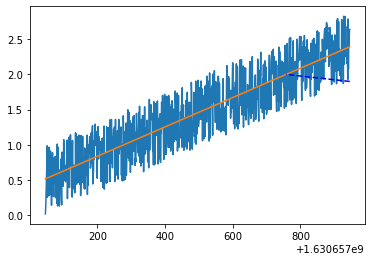

In [17]:
plt.plot(data[:, 0], data[:, 1] + np.random.random(size=900))
plt.plot(data[:, 0], reg.predict(data[:, 0].reshape(-1, 1)))
plt.plot([data[-1, 0], (data[:, 2].min() - reg.intercept_) / reg.coef_], [data[-1, 1], data[:, 2].min()], "--", color="blue")
plt.show()

In [63]:
(2 - reg.intercept_) / reg.coef_

array([1.63047895e+09])